In [1]:
#imports 
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import json
from sentence_transformers import SentenceTransformer
from sklearn.manifold import TSNE

/home/guillaumelevy/Documents/WorldLLM/.venv/lib/python3.10/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm, trange


In [2]:
#Load the data
path = "./outputs/metropolis_phi_phi_env_random/2024-08-19/18-05-40/all.json"
with open(path, "r") as file:
    data_mh = json.load(file)
path = "./outputs/is_phi_phi_env_random/2024-08-19/17-54-42/all.json"
with open(path, "r") as file:
    data_is = json.load(file)


In [3]:
#For fair comparison it is better to compare with the same true rule
assert data_mh["true_rule"] == data_is["true_rule"]
print(len(data_mh["rules"]), len(data_is["rules"]))

603 584


In [4]:
#Extract data
true_rule = data_mh["true_rule"]

all_rules_mh, all_rules_is = np.array(data_mh["rules"]), np.array(data_is["rules"])
all_likelihoods_mh, all_likelihoods_is = np.array(data_mh["likelihoods"]),np.array(data_is["likelihoods"])
metrics_mh, metrics_is = data_mh["metrics"], data_is["metrics"]

all_weights_mh = metrics_mh["weights"]
all_prev_rules_ind_mh = np.array(metrics_mh["prev_rules_ind"])
nb_particles_mh = metrics_mh["nb_particles"]


counts_is = np.array(metrics_is["counts"])

# Print rules

In [5]:
print("Metropolis Hastings")
indices = np.argsort(-np.array(all_likelihoods_mh))
print("------------------------")
print("true rule: " + repr(true_rule))
print("------------------------")
for ind in indices:
    print(
        f"-----rule-----:{ind%nb_particles_mh}-{ind//nb_particles_mh}({all_prev_rules_ind_mh[ind]}):   {repr(all_rules_mh[ind])}, likelihood: {all_likelihoods_mh[ind]:2f}, weight: {all_weights_mh[ind]:2f}"
    )

Metropolis Hastings
------------------------
true rule: 'opens with green key.'
------------------------
-----rule-----:1-88(86):   'The improved general rule can be: The door opens when you are holding a green key, regardless of its color, size, or type.', likelihood: -0.348042, weight: 0.278301
-----rule-----:2-118(117):   'The improved rule could be: "The door is opened when a green key, regardless of size, is held."', likelihood: -0.390318, weight: 0.016872
-----rule-----:2-121(118):   'The improved rule could be: "The door is opened when a green key, regardless of size, is held."', likelihood: -0.390318, weight: -0.040605
-----rule-----:1-61(60):   'The improved rule would be: "The door opens when you are holding a green key, regardless of its size."', likelihood: -0.392682, weight: 0.185955
-----rule-----:2-117(116):   'The improved rule could be: "The door is opened when a green key of any size is held."', likelihood: -0.423119, weight: 0.216084
-----rule-----:1-185(184):   'The

In [6]:
print("Importance Sampling")
indices = np.argsort(-np.array(all_likelihoods_is))
print("------------------------")
print("true rule: " + repr(true_rule))
print("------------------------")
for ind in indices:
    print(
        f"-----rule-----:{ind}:   {repr(all_rules_is[ind])}, likelihood: {all_likelihoods_is[ind]:2f}, count: {counts_is[ind]}"
    )

Importance Sampling
------------------------
true rule: 'opens with green key.'
------------------------
-----rule-----:375:   'The rule for the door is: Holding a green key, regardless of color or size, opens the door.', likelihood: -0.393846, count: 1
-----rule-----:202:   'The rule is "Holding a green key opens the door."', likelihood: -0.415045, count: 1
-----rule-----:536:   'The rule for opening the door is: Holding a green key opens the door.', likelihood: -0.415515, count: 1
-----rule-----:32:   'The rule for the door is that for it to be opened, you must be holding a green key.', likelihood: -0.438524, count: 1
-----rule-----:229:   'The rule for the door is that it will only open when you are holding a green key.', likelihood: -0.464745, count: 1
-----rule-----:364:   'The rule for opening the door is that it opens when you are holding a green key.', likelihood: -0.468307, count: 1
-----rule-----:47:   'The rule for the door is: If you hold a green key, regardless of its size

# Comparison

In [7]:
# restaure the counts for is for futur use
all_rules_is = np.repeat(all_rules_is, counts_is, axis=0)
all_likelihoods_is = np.repeat(all_likelihoods_is, counts_is, axis=0)

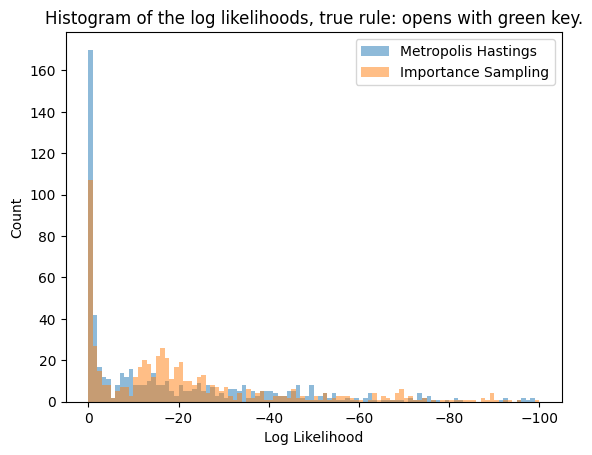

In [8]:
# Histogram of the likelihoods
plt.figure()
plt.hist(all_likelihoods_mh, range=(-100,0), bins=100, alpha=0.5, label="Metropolis Hastings")
plt.hist(all_likelihoods_is, range=(-100,0), bins=100, alpha=0.5, label="Importance Sampling")
plt.xlabel("Log Likelihood")
plt.ylabel("Count")
# Set the x-axis in descending order
plt.gca().invert_xaxis()
plt.legend()
plt.title(f"Histogram of the log likelihoods, true rule: {true_rule}")
plt.show()


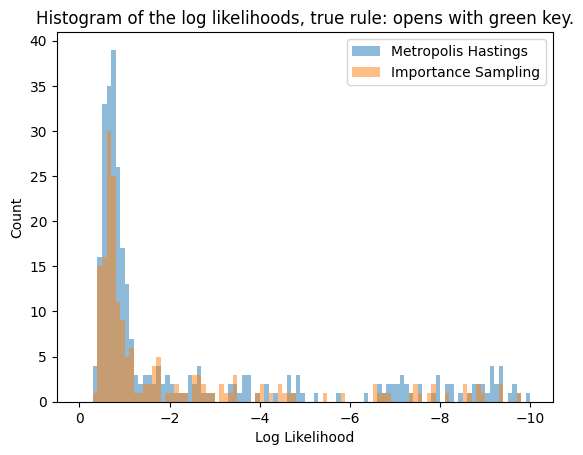

In [9]:
# Histogram of the likelihoods
plt.figure()
plt.hist(all_likelihoods_mh, range=(-10,0), bins=100, alpha=0.5, label="Metropolis Hastings")
plt.hist(all_likelihoods_is, range=(-10,0), bins=100, alpha=0.5, label="Importance Sampling")
plt.xlabel("Log Likelihood")
plt.ylabel("Count")
# Set the x-axis in descending order
plt.gca().invert_xaxis()
plt.legend()
plt.title(f"Histogram of the log likelihoods, true rule: {true_rule}")
plt.show()



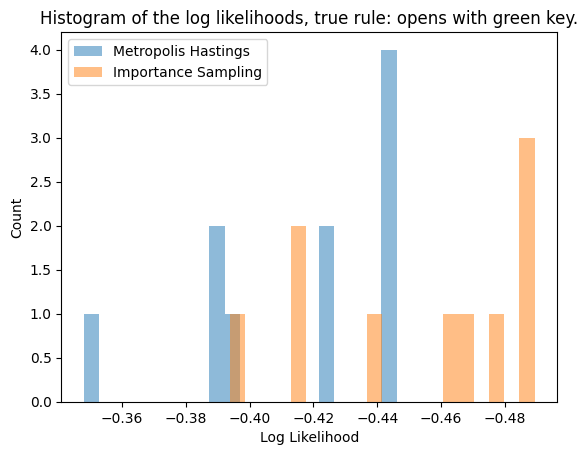

In [10]:
# Histogram of the likelihoods
plt.figure()
plt.hist(all_likelihoods_mh[np.argsort(-all_likelihoods_mh)[:10]], bins=20, alpha=0.5, label="Metropolis Hastings")
plt.hist(all_likelihoods_is[np.argsort(-all_likelihoods_is)[:10]], bins=20, alpha=0.5, label="Importance Sampling")
plt.xlabel("Log Likelihood")
plt.ylabel("Count")
# Set the x-axis in descending order
plt.gca().invert_xaxis()
plt.legend()
plt.title(f"Histogram of the log likelihoods, true rule: {true_rule}")
plt.show()


In [11]:
# Best rules of each method
best_taken = 10
best_rules_ind_mh = np.argsort(-all_likelihoods_mh)[:best_taken]
best_rules_ind_is = np.argsort(-all_likelihoods_is)[:best_taken]
all_likelihoods = np.concatenate([all_likelihoods_mh[best_rules_ind_mh], all_likelihoods_is[best_rules_ind_is]])
all_rules = np.concatenate([all_rules_mh[best_rules_ind_mh], all_rules_is[best_rules_ind_is]])
indices = np.argsort(-all_likelihoods)
for ind in indices:
    if ind < best_taken:
        color_start = "\x1b[31m"
        color_end = "\x1b[0m"
    else:
        color_start = "\033[92m"
        color_end = "\033[0m"
    print(
        f"{color_start}-----rule-----:{ind}:   {repr(all_rules[ind])}, likelihood: {all_likelihoods[ind]:2f}{color_end}"
    )

-----rule-----:0:   'The improved general rule can be: The door opens when you are holding a green key, regardless of its color, size, or type.', likelihood: -0.348042
-----rule-----:1:   'The improved rule could be: "The door is opened when a green key, regardless of size, is held."', likelihood: -0.390318
-----rule-----:2:   'The improved rule could be: "The door is opened when a green key, regardless of size, is held."', likelihood: -0.390318
-----rule-----:3:   'The improved rule would be: "The door opens when you are holding a green key, regardless of its size."', likelihood: -0.392682
-----rule-----:10:   'The rule for the door is: Holding a green key, regardless of color or size, opens the door.', likelihood: -0.393846
-----rule-----:11:   'The rule is "Holding a green key opens the door."', likelihood: -0.415045
-----rule-----:12:   'The rule for opening the door is: Holding a green key opens the door.', likelihood: -0.415515
-----rule-----:4:   'The improved rule could be: "Th

# Individual Analysis

## Metropolis Hasting analysis


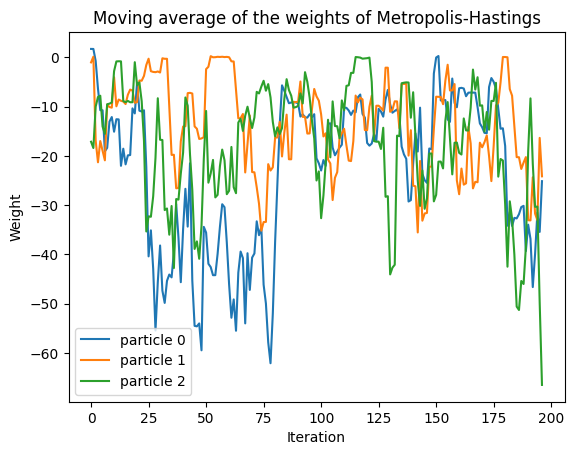

In [13]:
#Plot the moving average of the weights
window_size = 5
plt.figure()
for i_particle in range(nb_particles_mh):
    moving_avg = np.convolve([all_weights_mh[i_particle + i*nb_particles_mh] for i in range(len(all_weights_mh)//nb_particles_mh)], np.ones(window_size)/window_size, mode='valid')
    plt.plot(moving_avg, label="particle "+ str(i_particle))
plt.xlabel("Iteration")
plt.ylabel("Weight")
plt.legend()
plt.title("Moving average of the weights of Metropolis-Hastings")
plt.show()


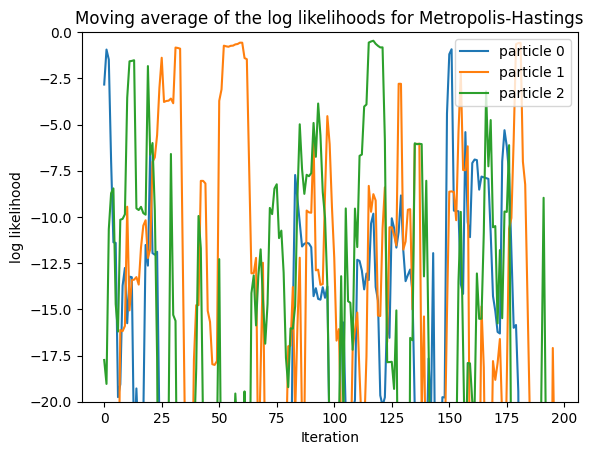

In [69]:
#Plot the likelihoods
window_size = 5
plt.figure()
for i_particle in range(nb_particles_mh):
    moving_avg = np.convolve([all_likelihoods_mh[i_particle + i*nb_particles_mh] for i in range(len(all_likelihoods_mh)//nb_particles_mh)], np.ones(window_size)/window_size, mode='valid')
    plt.plot(moving_avg, label="particle "+ str(i_particle))
plt.xlabel("Iteration")
plt.ylabel("log likelihood")
plt.legend()
plt.ylim(-20, 0)
plt.title("Moving average of the log likelihoods for Metropolis-Hastings")
plt.show()


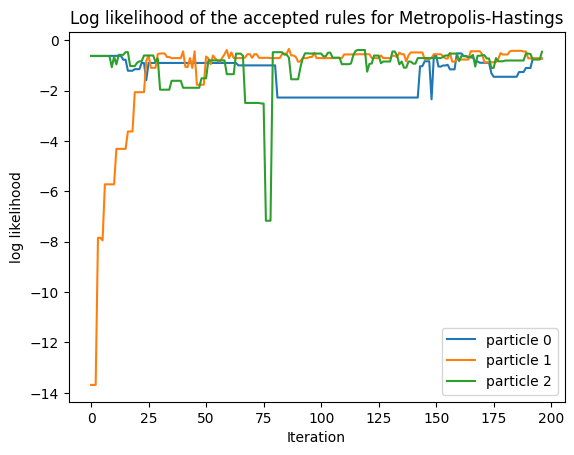

In [70]:
# Plot log likelihood only for rules accepted
plt.figure()
for i_particle in range(nb_particles_mh):
    indices = [i_particle + i*nb_particles_mh for i in range(len(all_prev_rules_ind_mh[nb_particles_mh:])//nb_particles_mh)]
    plt.plot(all_likelihoods_mh[indices][all_prev_rules_ind_mh[indices][nb_particles_mh:]], label="particle "+ str(i_particle))
plt.xlabel("Iteration")
plt.ylabel("log likelihood")
plt.legend()
plt.title("Log likelihood of the accepted rules for Metropolis-Hastings")
plt.show()

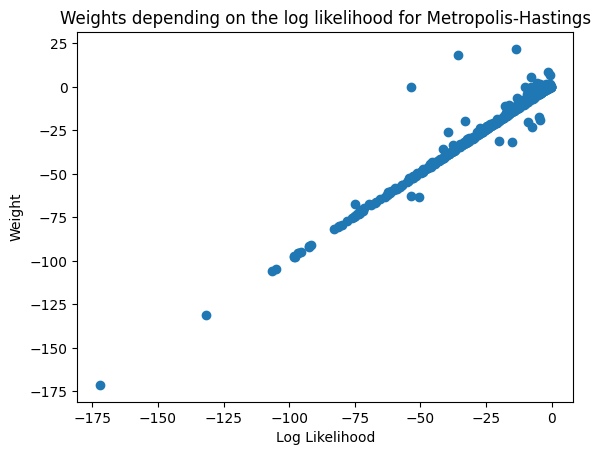

In [71]:
# Evolution of the weights depending on the likelihood
plt.figure()
plt.scatter(all_likelihoods_mh, all_weights_mh)
plt.xlabel("Log Likelihood")
plt.ylabel("Weight")
plt.title("Weights depending on the log likelihood for Metropolis-Hastings")
plt.show()


Text(0.5, 1.0, 'Weights depending on the log likelihood difference')

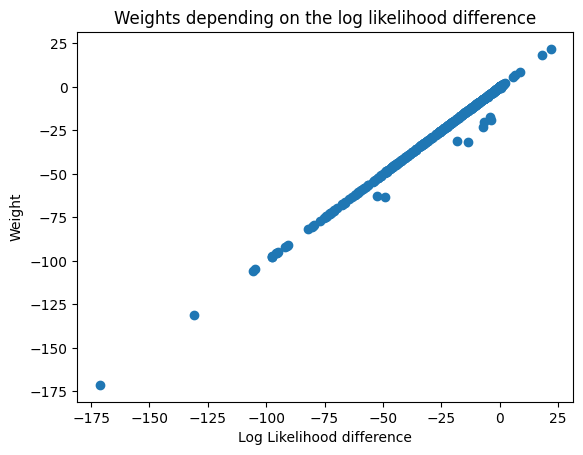

In [72]:
#Compute difference between rule and previous rule
# Find the position of the gloabl array given the branch and branch index

prev_indices = all_prev_rules_ind_mh[3:] * nb_particles_mh + np.tile(np.arange(nb_particles_mh),(len(all_weights_mh)//nb_particles_mh) -1)
all_likelihoods_mh[3:] - all_likelihoods_mh[prev_indices]
plt.figure()
plt.scatter(all_likelihoods_mh[3:]- all_likelihoods_mh[prev_indices], all_weights_mh[3:])
plt.xlabel("Log Likelihood difference")
plt.ylabel("Weight")
plt.title("Weights depending on the log likelihood difference")

# Embeddings

In [87]:
model = SentenceTransformer("all-mpnet-base-v2")
embeddings = model.encode(np.concatenate([all_rules_mh, all_rules_is], axis=0))
proj_embeddings = TSNE(n_components=2).fit_transform(embeddings)

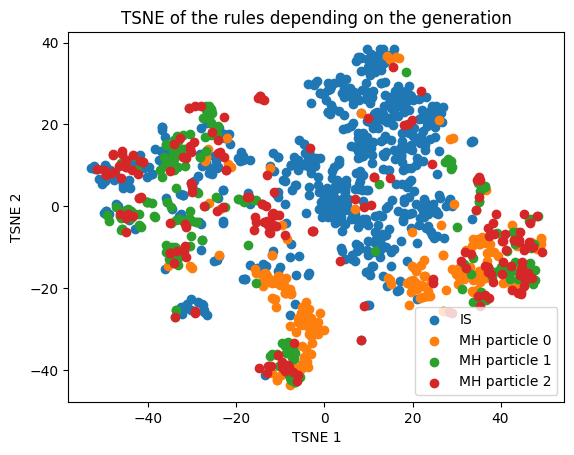

In [83]:
# Plot the embeddings
plt.figure()
plt.scatter(proj_embeddings[len(all_rules_mh):,0], proj_embeddings[len(all_rules_mh):,1], label="IS")
#Plot MH
indices = [np.arange(len(all_rules_mh), step=nb_particles_mh) + i for i in range(nb_particles_mh)]
for i, ind in enumerate(indices):
    plt.scatter(proj_embeddings[ind,0], proj_embeddings[ind,1], label="MH particle "+str(i))
plt.legend()
plt.xlabel("TSNE 1")
plt.ylabel("TSNE 2")
plt.title("TSNE of the rules depending on the generation")
plt.show()

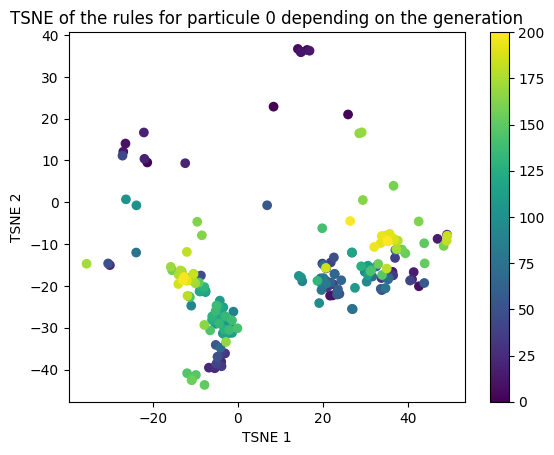

In [84]:
plt.figure()
plt.scatter(proj_embeddings[indices[0],0], proj_embeddings[indices[0],1], c=np.arange(len(indices[0])))
plt.colorbar()
plt.xlabel("TSNE 1")
plt.ylabel("TSNE 2")
plt.title("TSNE of the rules for particule 0 depending on the generation")
plt.show()

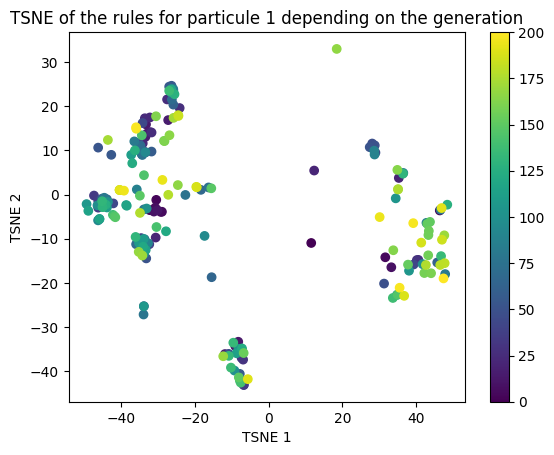

In [85]:
plt.figure()
plt.scatter(proj_embeddings[indices[1],0], proj_embeddings[indices[1],1], c=np.arange(len(indices[1])))
plt.colorbar()
plt.xlabel("TSNE 1")
plt.ylabel("TSNE 2")
plt.title("TSNE of the rules for particule 1 depending on the generation")
plt.show()

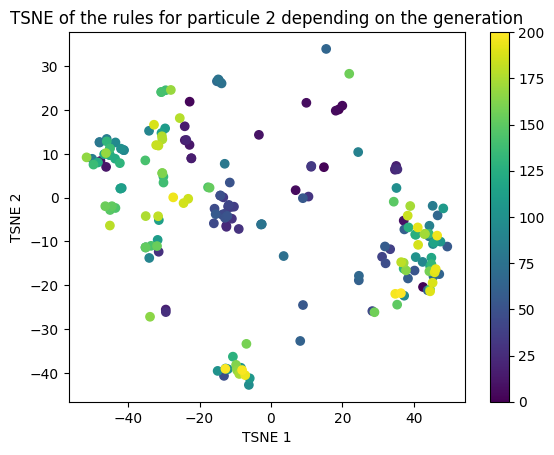

In [86]:
plt.figure()
plt.scatter(proj_embeddings[indices[2],0], proj_embeddings[indices[2],1], c=np.arange(len(indices[2])))
plt.colorbar()
plt.xlabel("TSNE 1")
plt.ylabel("TSNE 2")
plt.title("TSNE of the rules for particule 2 depending on the generation")
plt.show()

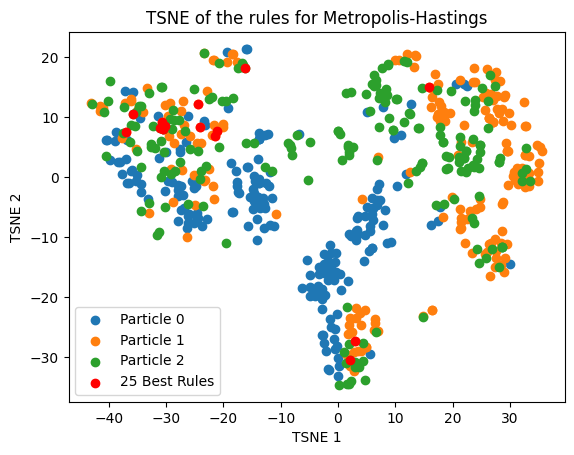

In [23]:
indices = [np.arange(len(all_rules_mh), step=nb_particles_mh) + i for i in range(nb_particles_mh)]
best_rules_ind = np.argsort(-np.array(all_likelihoods_mh))
# Plot the embeddings
plt.figure()
plt.scatter(proj_embeddings[indices[0],0], proj_embeddings[indices[0],1], label= "Particle 0")
plt.scatter(proj_embeddings[indices[1],0], proj_embeddings[indices[1],1], label= "Particle 1")
plt.scatter(proj_embeddings[indices[2],0], proj_embeddings[indices[2],1], label= "Particle 2")
plt.scatter(proj_embeddings[best_rules_ind[:15],0], proj_embeddings[best_rules_ind[:15],1], c="red", label= "25 Best Rules")
plt.legend()
plt.xlabel("TSNE 1")
plt.ylabel("TSNE 2")
plt.title("TSNE of the rules for Metropolis-Hastings")
plt.show()

#### Only for accepted rules

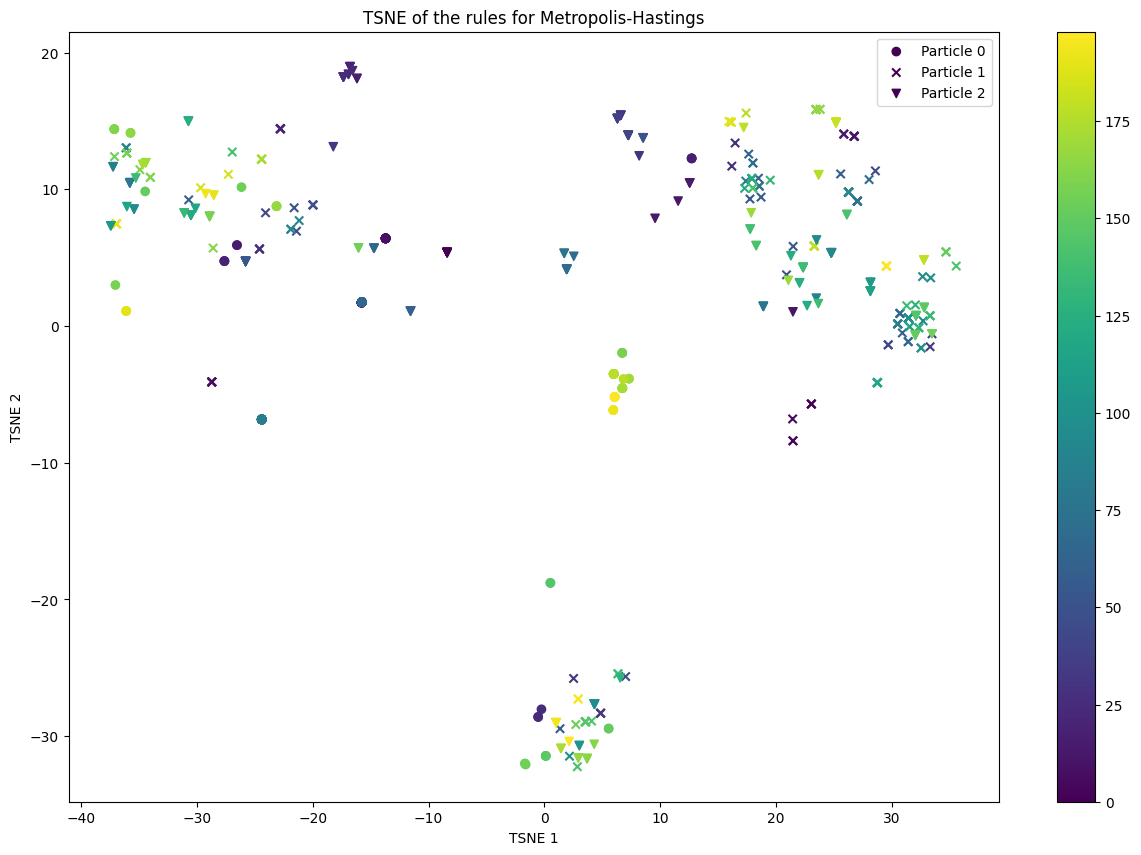

In [56]:
from matplotlib.colors import Normalize


indices = [np.arange(len(all_prev_rules_ind_mh[nb_particles_mh:]), step=nb_particles_mh) + i for i in range(nb_particles_mh)]
all_prev_rules_ind_mh = np.array(metrics_mh["prev_rules_ind"])
# Plot the embeddings
symbols = ["o", "x", "v", "^", "<", ">", "1", "2", "3", "4"]
plt.figure(figsize=(15,10))
for i in range(len(indices)):
    plt.scatter(proj_embeddings[indices[i],0][all_prev_rules_ind_mh[indices[i]][nb_particles_mh:]], proj_embeddings[indices[i],1][all_prev_rules_ind_mh[indices[i]][nb_particles_mh:]], label= f"Particle {i}", marker=symbols[i], c=all_prev_rules_ind_mh[indices[i]][nb_particles_mh:])
plt.legend()
plt.colorbar()
plt.xlabel("TSNE 1")
plt.ylabel("TSNE 2")
plt.title("TSNE of the rules for Metropolis-Hastings")
plt.show()

#### Plot of the evolution of the likelihoods

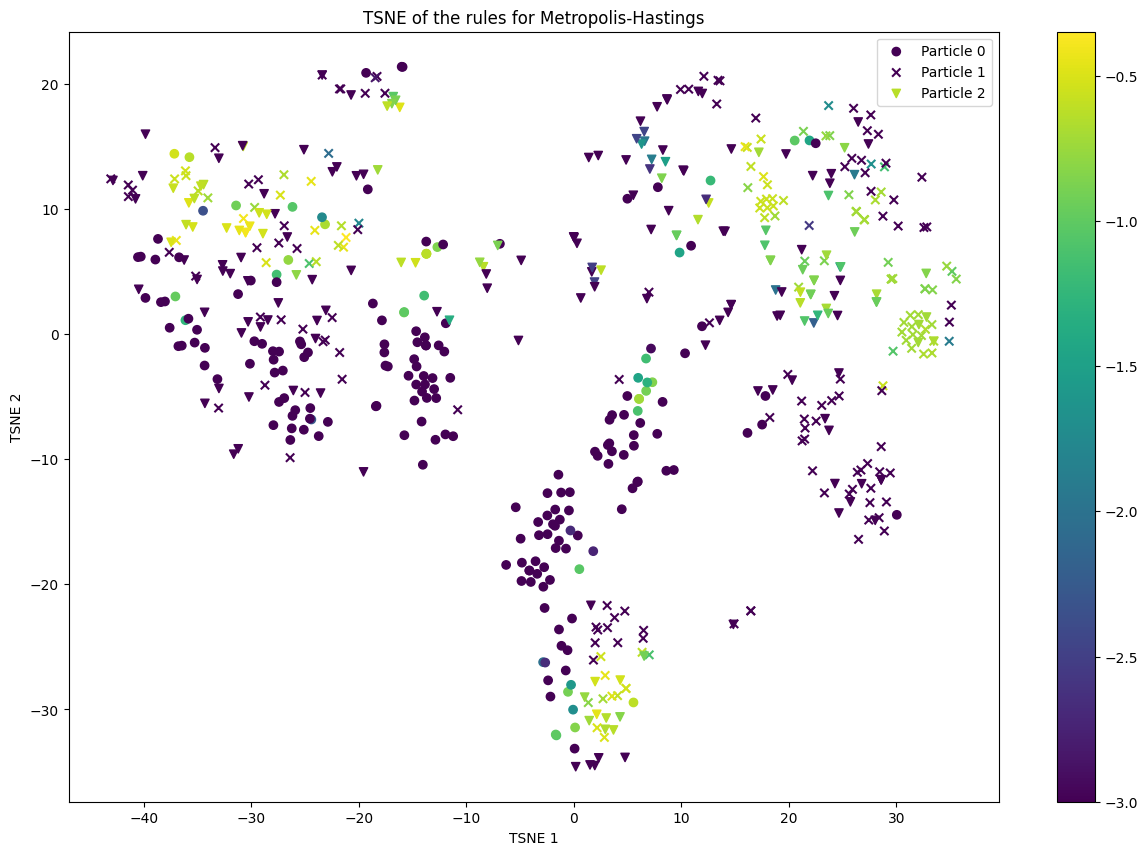

In [40]:
from matplotlib.colors import Normalize


indices = [np.arange(len(all_rules_mh), step=nb_particles_mh) + i for i in range(nb_particles_mh)]
best_rules_ind = np.argsort(-np.array(all_likelihoods_mh))
# Plot the embeddings
symbols = ["o", "x", "v", "^", "<", ">", "1", "2", "3", "4"]
min_likelihood, max_likelihood = np.min(all_likelihoods_mh), np.max(all_likelihoods_mh)
norm = Normalize(vmin=-3, vmax=max_likelihood)
plt.figure(figsize=(15,10))
for i in range(len(indices)):
    plt.scatter(proj_embeddings[indices[i],0], proj_embeddings[indices[i],1], label= f"Particle {i}", marker=symbols[i], c=all_likelihoods_mh[indices[i]], cmap="viridis", norm=norm)
plt.legend()
plt.colorbar()
plt.xlabel("TSNE 1")
plt.ylabel("TSNE 2")
plt.title("TSNE of the rules for Metropolis-Hastings")
plt.show()

### Look clusters rules

In [23]:
best_rules_ind[:15] % 3

array([1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2])

In [24]:
print(np.where((proj_embeddings[best_rules_ind[:15],0]) <0 & (proj_embeddings[best_rules_ind[:15],1] >0)))
all_rules_mh[best_rules_ind[np.where((proj_embeddings[best_rules_ind[:15],0]) <0 & (proj_embeddings[best_rules_ind[:15],1] >0))]]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 13, 14]),)


array(['The improved general rule can be: The door opens when you are holding a green key, regardless of its color, size, or type.',
       'The improved rule could be: "The door is opened when a green key, regardless of size, is held."',
       'The improved rule could be: "The door is opened when a green key, regardless of size, is held."',
       'The improved rule would be: "The door opens when you are holding a green key, regardless of its size."',
       'The improved rule could be: "The door is opened when a green key of any size is held."',
       'The improved rule, respecting all given trajectories, could be: "The door will open when you are holding a green key, regardless of its color or size."',
       "The rule should be 'The door opens when holding a medium or large green key, regardless of other colors or sizes.'",
       'The improved general rule is: "The door opens when you are holding a key that is green in color."',
       "The improved rule for the door is: 'The do

In [25]:
all_rules_mh[best_rules_ind[11:13]]

array(['"The door will open when you are holding a key with green color."',
       '"The door opens if you are holding a green key, regardless of color or size."'],
      dtype='<U498')

In [26]:
all_rules_mh[best_rules_ind[9]]

'The door will open if you are holding any green key, regardless of its color or size.'